In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows

In [3]:
diab_df = pd.read_csv('diabetes.csv') 
print(diab_df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients

In [5]:
y = diab_df['Outcome']
X = diab_df.drop('Outcome', axis=1)
log_reg = LogisticRegression()
log_reg.fit(X, y)
print("Intercept: ", log_reg.intercept_)
print("Coefficients: ", log_reg.coef_)

Intercept:  [-7.70292394]
Coefficients:  [[ 1.17252337e-01  3.35999646e-02 -1.40873451e-02 -1.27043834e-03
  -1.24032836e-03  7.72022060e-02  1.41904207e+00  1.00352521e-02]]


/Users/yiyunlei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40457704), 'w1': array(0.12319452), 'w2': array(0.03516515), 'w3': array(-0.01329922), 'w4': array(0.00062108), 'w5': array(-0.00119174), 'w6': array(0.08969398), 'w7': array(0.94530223), 'w8': array(0.01487058)}


1. What are the prior probabilities of the intercept and coefficients?
The prior probabilities of the intercept and coefficients are Normal distributions with mean=0 and standard deviation=100.

2. Which likelihood distribution has been used?
A Bernoulli likelihood distribution has been used to model the binary outcome (0 or 1).

3. What does pm.invlogit(linreg) mean?
linreg is the linear regression equation, and pm.invlogit() transforms the linreg(linear regression) to the probability scale the logistic function.

4. What is map_est?
map_est are parameter values(w0,w1,w2,w3,w4,...w8) that maximize the posterior distribution of the parameters, and they can be considered as the "best" values for the parameters. We can know the relationship between the parameters and outcome by MAP. For instance, if the MAP estimate of a parameter is positive, it means that it's positively correlated with the probability of the outcome being 1; if the MAP estimate is negative, it indicates that the variable is negatively correlated with the probability of the outcome being 1.

/Users/yiyunlei/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: 

Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 9 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


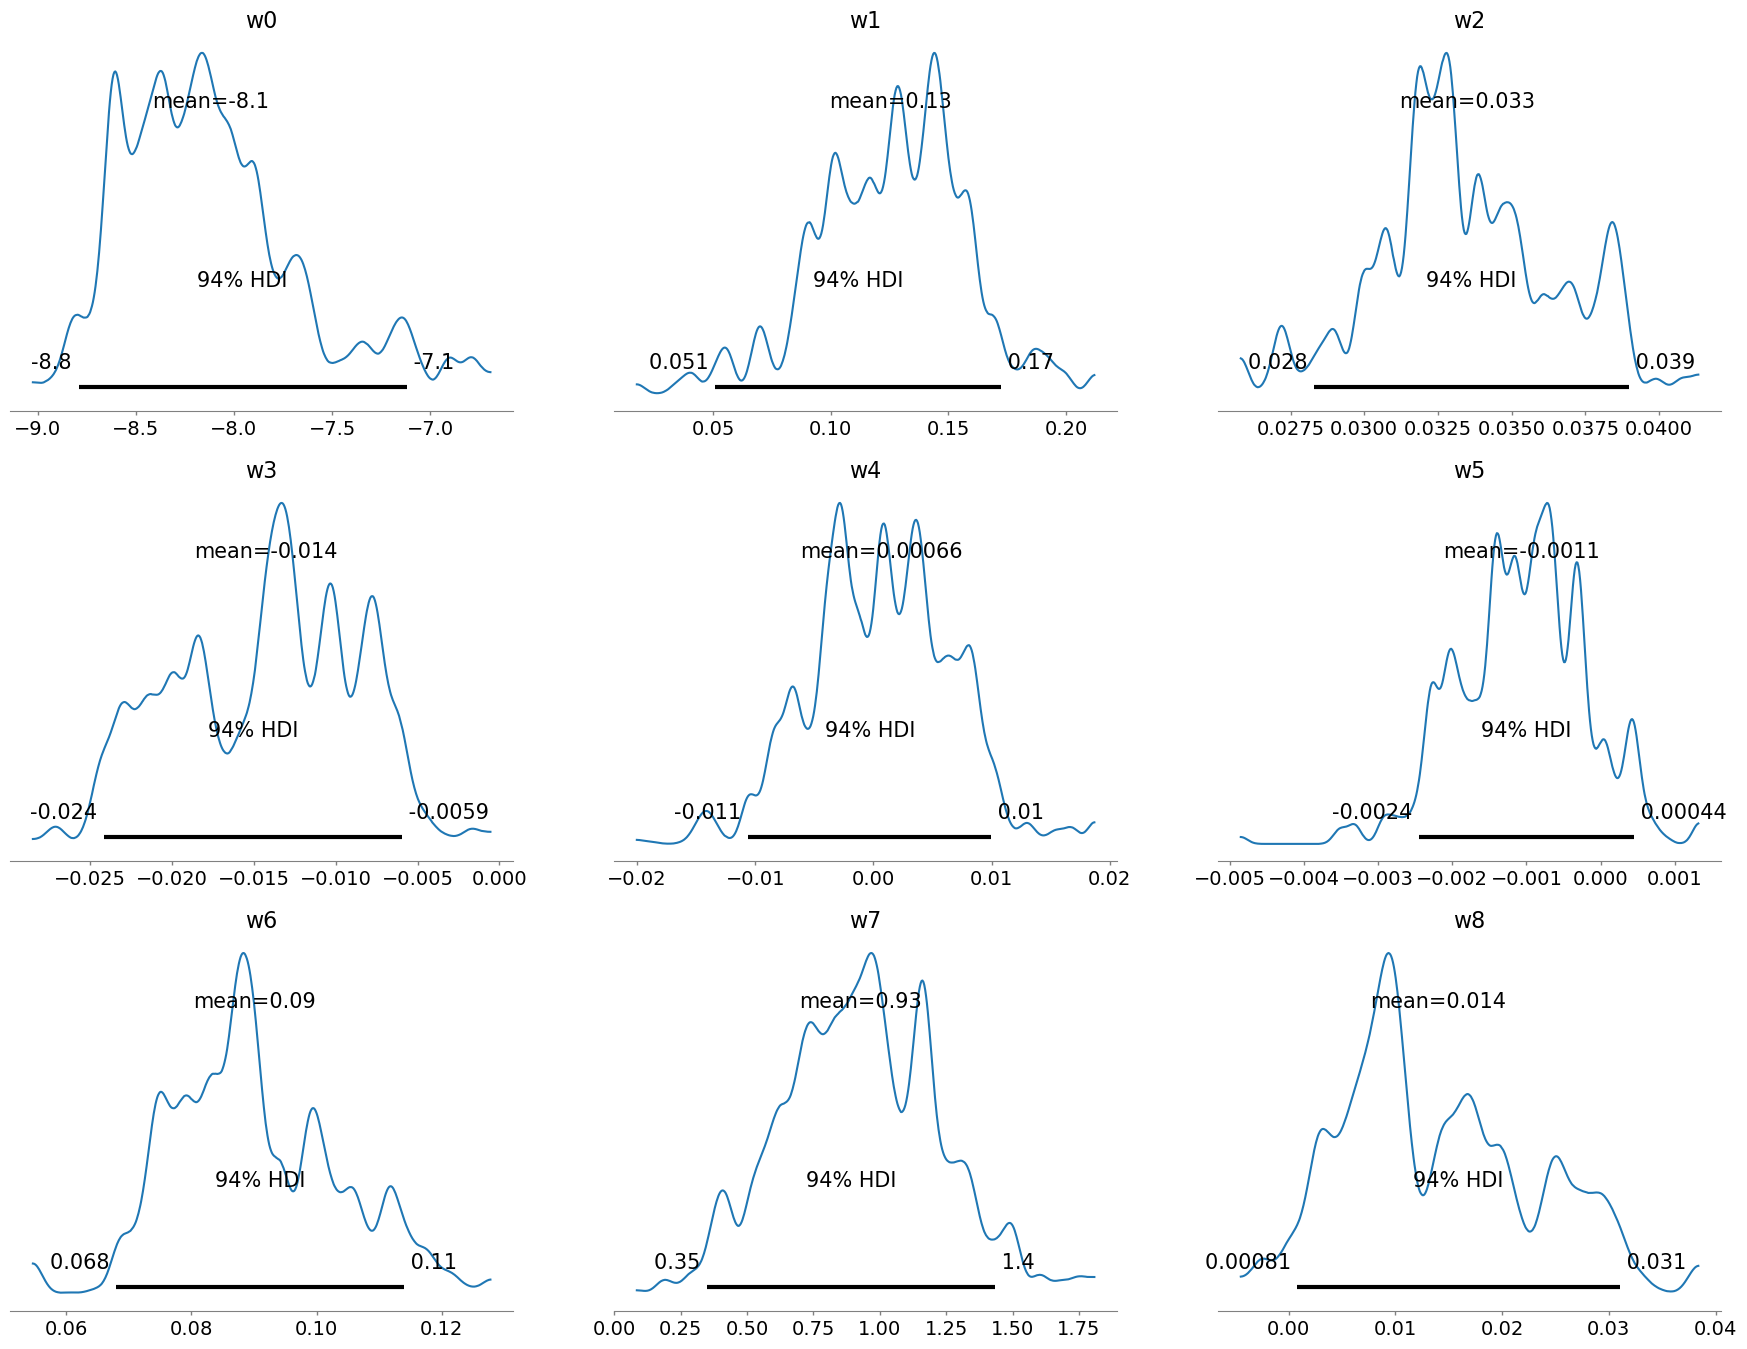

In [7]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(400, step=pm.Metropolis())
## Explain the output of the plot 
    az.plot_posterior(trace)

1. Explain the output of the plot
The plot shows the probability density function (PDF) of each parameter.(w0,w1,w2,...w8), and it shows the means and 94% HDI(Highest Density Interval) of parameters. Based on the plot, we can inspect the posterior distribution of each parameter and assess the strength and direction of their effects on the outcome. We can see that some parameters have larger fluctuations(such as w0,w1,w7), while some parameters have smaller fluctuations(such as w5).